In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 10 05:58:58 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
fail_probability = [0, 0.05, 0.1]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=127.90737574832633, L=53.77094805755866, U=6931.471805599453
k=2, rel_gap=45.33525018761054, L=94.81332674776431, U=4393.199215977325
k=3, rel_gap=18.023555802771675, L=152.15719432046222, U=2894.5708769484863
k=4, rel_gap=7.498999372304177, L=231.66590452573416, U=1968.928377148494
k=5, rel_gap=4.228145937214922, L=272.0236331847568, U=1422.1792526613287
k=6, rel_gap=3.1116542192215313, L=345.8897992960588, U=1422.1792526613287
k=7, rel_gap=2.1229356310378606, L=376.36101826760967, U=1175.3512340816094
k=8, rel_gap=1.749676951499637, L=427.4506623189275, U=1175.3512340816094
k=9, rel_gap=1.4065660573456922, L=488.3935059642435, U=1175.3512340816094
k=10, rel_gap=1.0679370637045356, L=506.7826502531374, U=1047.9946257008755
k=11, rel_gap=0.9394840074775618, L=540.3471344235871, U=1047.9946257008755
k=12, rel_gap=0.8173424481394078, L=576.6632627625083, U=1047.9946257008755
k=13, rel_gap=0.695

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=72, rel_gap=0.0008936642758218964, L=957.4830708319053, U=958.338739247012
k=73, rel_gap=0.0008431993717110894, L=957.5313494147917, U=958.338739247012
k=74, rel_gap=0.0007989051985594811, L=957.5737286172157, U=958.338739247012
k=75, rel_gap=0.0007277714979900986, L=957.6417948434408, U=958.338739247012
k=76, rel_gap=0.0006750804867551634, L=957.6922199170288, U=958.338739247012
k=77, rel_gap=0.0006515200904891468, L=957.7147688341583, U=958.338739247012
k=78, rel_gap=0.0005517209667029961, L=957.7311734312564, U=958.2595738001035
k=79, rel_gap=0.000525668121715835, L=957.7561119436762, U=958.2595738001035
k=80, rel_gap=0.00050596083706693, L=957.7749771709323, U=958.2595738001035
k=81, rel_gap=0.00048172617372991167, L=957.7981773489237, U=958.2595738001035
k=82, rel_gap=0.00045568337348737316, L=957.8231097342556, U=958.2595738001035
k=83, rel_gap=0.00043236511812150545, L=957.8454348455243, U=958.2595738001035
k=84, rel_gap=0.0003923391996226191, L=957.8638260715127, U=958.239633

k=80, rel_gap=0.0018304563728460295, L=956.4228641638612, U=958.1735544907056
k=81, rel_gap=0.0016568985139290887, L=956.588584286959, U=958.1735544907056
k=82, rel_gap=0.001548026350629508, L=956.692569184157, U=958.1735544907056
k=83, rel_gap=0.0014401213264997157, L=956.7956526661987, U=958.1735544907056
k=84, rel_gap=0.0013561704347227442, L=956.8758677291916, U=958.1735544907056
k=85, rel_gap=0.0013145660279922722, L=956.9156257174824, U=958.1735544907056
k=86, rel_gap=0.0012789370143600515, L=956.9496761290243, U=958.1735544907056
k=87, rel_gap=0.0012707675710954985, L=956.956863144224, U=958.172932892845
k=88, rel_gap=0.001192859395200809, L=957.0309233837163, U=958.1725267121723
k=89, rel_gap=0.0010944795562265624, L=957.1249729964737, U=958.1725267121723
k=90, rel_gap=0.0010173542572861742, L=957.1978552485084, U=958.1716645616107
k=91, rel_gap=0.0009057502218548915, L=957.3045857207114, U=958.1716645616107
k=92, rel_gap=0.0007998623851893974, L=957.4055367058572, U=958.171329

k=89, rel_gap=0.05839107527448234, L=906.3459797533868, U=959.2684960818913
k=90, rel_gap=0.0562481594533928, L=908.1847740954281, U=959.2684960818913
k=91, rel_gap=0.04979975587521002, L=913.7633064909188, U=959.2684960818913
k=92, rel_gap=0.04685421534669478, L=916.0899623935752, U=959.0126387685093
k=93, rel_gap=0.04494371227485334, L=917.7648781490142, U=959.0126387685093
k=94, rel_gap=0.04287105016441906, L=919.588897033158, U=959.0126387685093
k=95, rel_gap=0.041734345045959395, L=920.592321189333, U=959.0126387685093
k=96, rel_gap=0.04100873056545657, L=921.2340018009181, U=959.0126387685093
k=97, rel_gap=0.0395635222067362, L=922.5147076464964, U=959.0126387685093
k=98, rel_gap=0.03912819063363148, L=922.7023148789215, U=958.805986953597
k=99, rel_gap=0.03833305513652096, L=923.4089025775379, U=958.805986953597


# Centralized solution

In [5]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

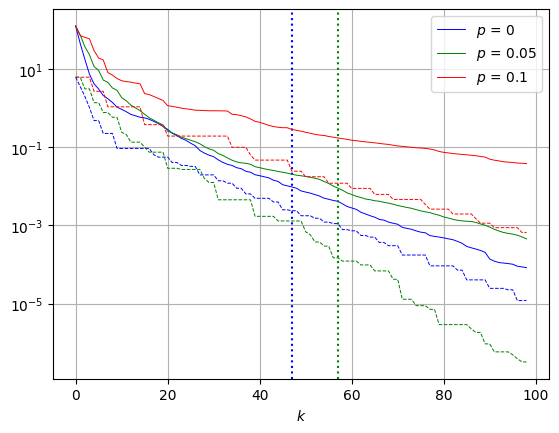

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)